In [96]:
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1
import seaborn as sns
import numpy as np
import pandas as pd

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

In [70]:
maha_post = pd.read_pickle("simulate_maha_post.pkl")
maha_pre = pd.read_pickle("simulate_maha_pre.pkl")
maha_post

,param,score,perm_scores,pval
0,0.0,0.387792,"[0.5084522724972164, 0.49934203866788135, 0.42...",0.996201
1,0.0,0.541617,"[0.43907563025210083, 0.5660264105642258, 0.51...",0.154569
2,0.0,0.522200,"[0.5129999999999999, 0.5215, 0.446899999999999...",0.291342
3,0.0,0.498248,"[0.5146631968771894, 0.5340806726053449, 0.488...",0.520296
4,0.0,0.489296,"[0.48539415766306526, 0.5236094437775111, 0.50...",0.595881
...,...,...,...,...
2495,1.5,0.800381,"[0.4908671216378964, 0.5162585307105579, 0.557...",0.000200
2496,1.5,0.827731,"[0.525110044017607, 0.4663865546218487, 0.4997...",0.000200
2497,1.5,0.857386,"[0.5492549254925493, 0.4837483748374838, 0.514...",0.000200
2498,1.5,0.862828,"[0.5406491809868355, 0.5227615315043714, 0.519...",0.000200


In [71]:
maha_post

,param,score,perm_scores,pval
0,0.0,0.387792,"[0.5084522724972164, 0.49934203866788135, 0.42...",0.996201
1,0.0,0.541617,"[0.43907563025210083, 0.5660264105642258, 0.51...",0.154569
2,0.0,0.522200,"[0.5129999999999999, 0.5215, 0.446899999999999...",0.291342
3,0.0,0.498248,"[0.5146631968771894, 0.5340806726053449, 0.488...",0.520296
4,0.0,0.489296,"[0.48539415766306526, 0.5236094437775111, 0.50...",0.595881
...,...,...,...,...
2495,1.5,0.800381,"[0.4908671216378964, 0.5162585307105579, 0.557...",0.000200
2496,1.5,0.827731,"[0.525110044017607, 0.4663865546218487, 0.4997...",0.000200
2497,1.5,0.857386,"[0.5492549254925493, 0.4837483748374838, 0.514...",0.000200
2498,1.5,0.862828,"[0.5406491809868355, 0.5227615315043714, 0.519...",0.000200


In [72]:
maha_post.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.503441  0.279188  0.499908  0.039318
0.375  0.068012  0.119325  0.586924  0.041559
0.750  0.000541  0.001864  0.688973  0.037712
1.125  0.000200  0.000000  0.776229  0.032772
1.500  0.000200  0.000000  0.844670  0.024719

In [73]:
maha_pre.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.483709  0.287623  0.502463  0.041182
0.375  0.090907  0.128532  0.584389  0.041220
0.750  0.004687  0.012503  0.686396  0.035799
1.125  0.000857  0.001231  0.776063  0.031669
1.500  0.000465  0.000402  0.844230  0.025807

In [74]:
null_scores = maha_post.explode("perm_scores").groupby("param").agg({"perm_scores":("mean", "std")})

(array([16., 18., 14., 20., 12., 18., 13., 14., 11., 14.]),
 array([0.00359928, 0.10085983, 0.19812038, 0.29538092, 0.39264147,
        0.48990202, 0.58716257, 0.68442312, 0.78168366, 0.87894421,
        0.97620476]),
 <BarContainer object of 10 artists>)

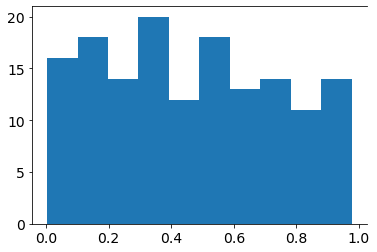

In [62]:
plt.hist(maha_pre[maha_pre.param==0.]['pval'])

In [33]:
(maha_pre[maha_pre.param==0.]['pval'] < .05).mean()

0.04

## Are we over-fitting or under-fitting?

In [103]:
maha_pre['type'] = "pre"
maha_post['type'] = "post"
maha = pd.concat([maha_post, maha_pre])
expected_auc = auc_from_maha(np.unique(maha["param"]))

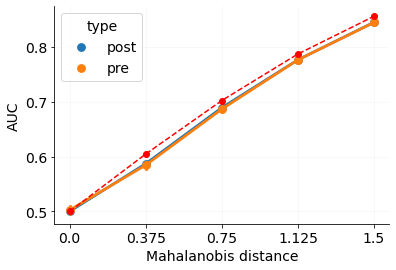

In [110]:
ax = sns.pointplot(data=maha, x="param", y="score", hue='type', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

(0.368359375, 1.0)

<Figure size 432x720 with 0 Axes>

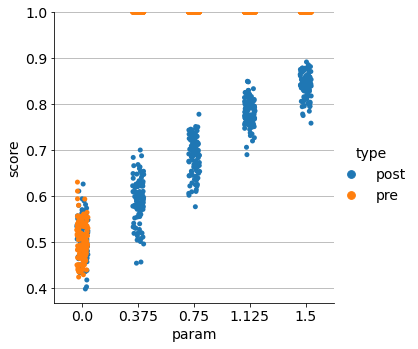

In [68]:
plt.figure(figsize=(6, 10))
sns.catplot(data=maha, x='param', y='score', hue="type", kind='strip')
plt.ylim(None, 1)

(0.0, 1.0)

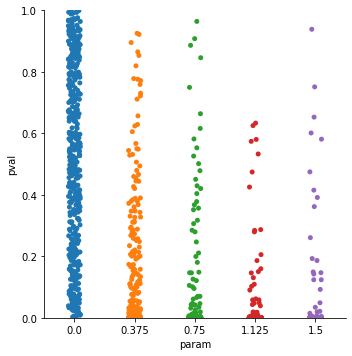

In [35]:
sns.catplot(data=maha_post, x='param', y='pval', kind='strip')
plt.ylim(0, 1)

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

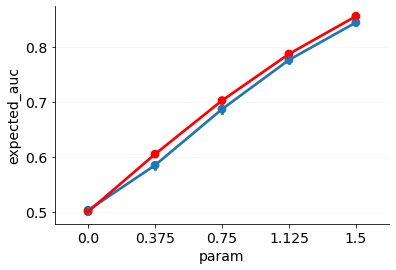

In [97]:
ax = sns.pointplot(data=maha_pre, x="param", y="score",)
sns.pointplot(data=maha_pre, x="param", y="expected_auc", ax=ax, color='red')

In [92]:
samplesize_post = pd.read_pickle("simulate_samplesize_post.pkl")
samplesize_post['type'] = 'post'
samplesize_pre = pd.read_pickle("simulate_samplesize_pre.pkl")
samplesize_pre['type'] = 'pre'
samplesize = pd.concat([samplesize_post, samplesize_pre]).reset_index(drop=True)

samplesize['pos'] = samplesize['pval']<=.05 

Text(0.5, 0, 'N samples')

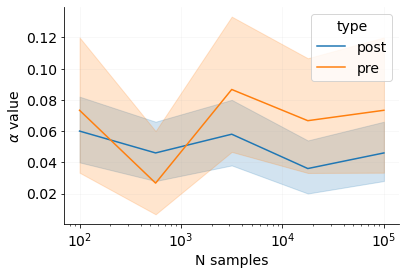

In [98]:
ax = sns.lineplot(data=samplesize, x="param", y="pos", hue='type')
plt.xscale("log")
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"N samples")

In [24]:
import time

In [25]:
time.strftime("%m%d%y_%H:%M")

'032023_14:25'

In [ ]:
samplesize